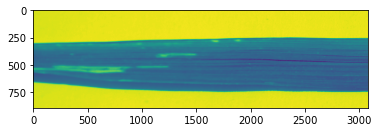

In [3]:
from PIL import Image
import stepic
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.misc
import scipy.ndimage
import skimage.filters
import sklearn.metrics
im1=cv2.imread('1.jpg')
im2 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
#cv2.imshow('Input Image',im1)
plt.imshow(im1)
#cv2.imshow('GrayImage',im2)
plt.imshow(im2)
#cv2.waitKey();
#cv2.destroAllWindows()

In [2]:
#pip install stepic

  Created wheel for stepic: filename=stepic-0.5.0-py3-none-any.whl size=12432 sha256=2fe7049b7e6387ce27833925c19cb0b5969101bf7e0d09f4319d13faf20a6169
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\72\39\64\755f2790b260934304393caf0b8d68d04303c59eda5b4250a9
Successfully built stepic
Note: you may need to restart the kernel to use updated packages.


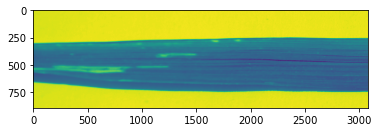

In [4]:
cv2.imshow('GrayImage',im2)
plt.imshow(im2)
cv2.waitKey();

Text(0.5, 1.0, 'median filtered image')

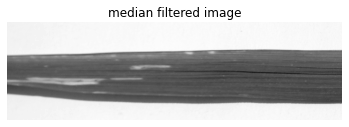

In [5]:
median_filtered = scipy.ndimage.median_filter(im2, size=3)
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')
plt.title('median filtered image')

Text(0, 0.5, 'Count')

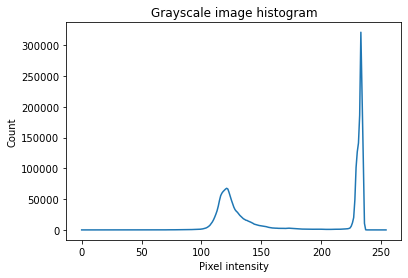

In [6]:
counts, vals = np.histogram(im2, bins=range(2 ** 8))
plt.plot(range(0, (2 ** 8) - 1), counts)
plt.title('Grayscale image histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Count')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


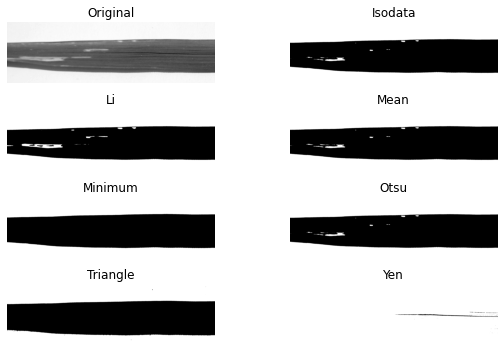

In [7]:
result = skimage.filters.thresholding.try_all_threshold(median_filtered)

Threshold value is 178


Text(0.5, 1.0, 'otsu predicted binary image')

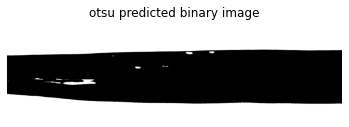

In [8]:
threshold = skimage.filters.threshold_otsu(median_filtered)
print('Threshold value is {}'.format(threshold))
predicted = np.uint8(median_filtered > threshold) * 255
plt.imshow(predicted, cmap='gray')
plt.axis('off')
plt.title('otsu predicted binary image')

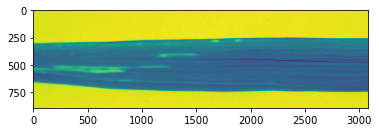

In [9]:
import cv2
import numpy as np

img = cv2.imread("1.jpg",0)

import matplotlib.pyplot as plt

plt.imshow(img)

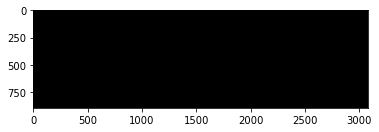

In [10]:
ret,thresh1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap="gray")

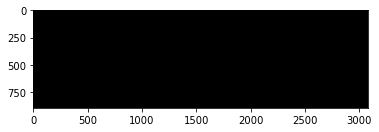

In [11]:
kernel = np.ones((20,20),np.uint8)
opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap="gray")

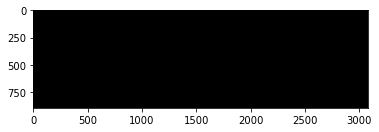

In [12]:
kernel = np.ones((120,120),np.uint8)
erosion = cv2.erode(opening,kernel,iterations = 1)
plt.imshow(erosion, cmap="gray")

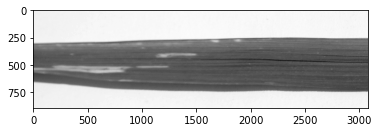

In [13]:
merged = cv2.bitwise_and(img, img , mask=erosion)
plt.imshow(merged, cmap="gray")

In [14]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2lab, lab2rgb
import matplotlib.pylab as plt

In [17]:
im = imread('1.jpg')
im1 = rgb2lab(im)

In [18]:
im1[...,1] = im1[...,2] = 0

In [19]:
im1 = lab2rgb(im1)

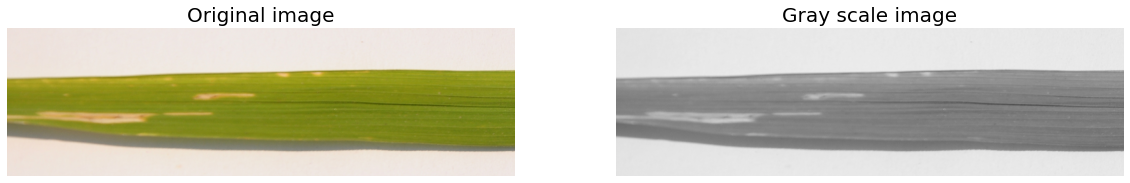

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('Gray scale image', size=20)
plt.show()

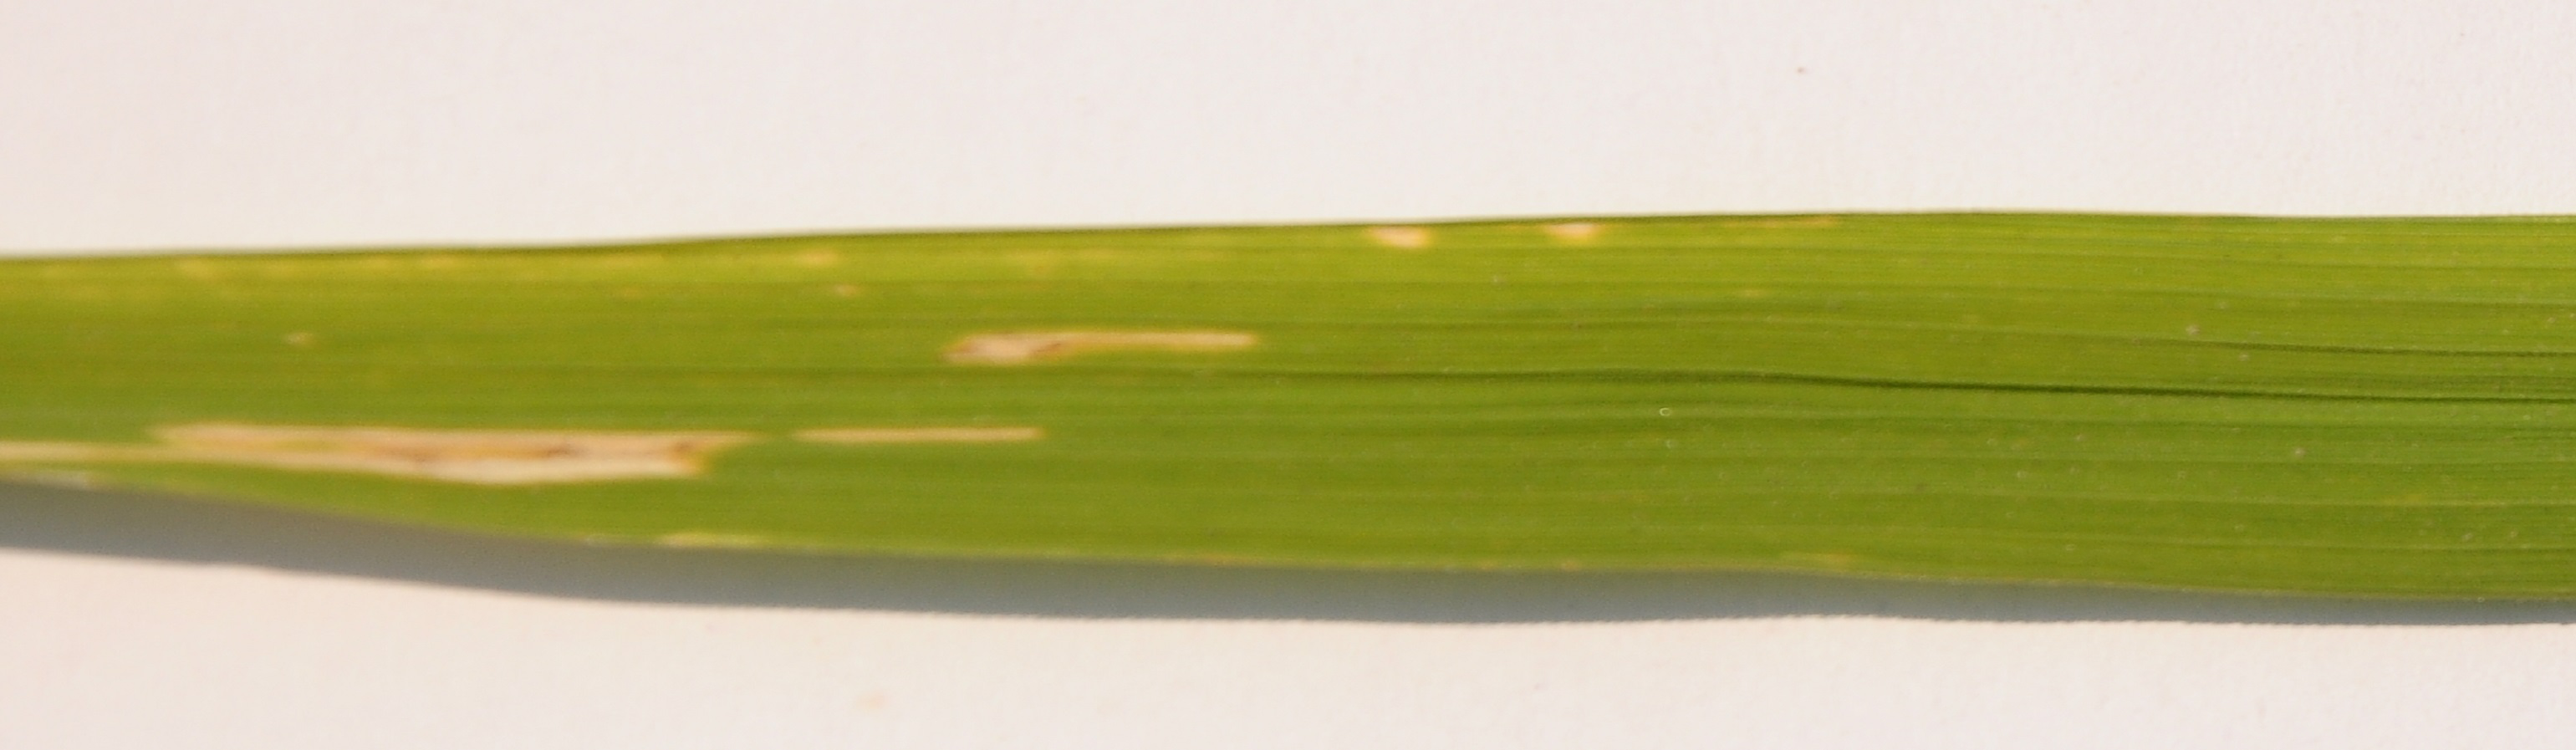

In [26]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
im = Image.open("1.jpg")
#area = (0, 0, 210, 210)
#im = im.crop(area)
im

In [27]:
im_array = np.asarray(im.convert('L'))
im_array < 200

x_start = np.where(np.sum(im_array<200, axis=0) != 0)[0][0]
y_start = np.where(np.sum(im_array<200, axis=1) != 0)[0][0]
start_point = (x_start, y_start)
im_array[24, 59]

228

897 3081
Sigma:50


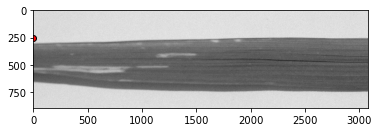

Sigma:100


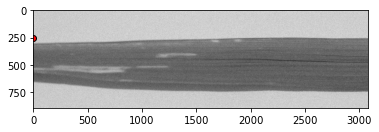

Sigma:150


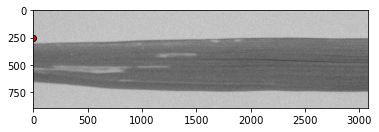

Sigma:200


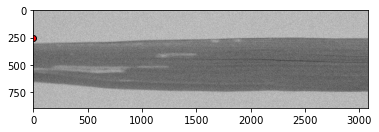

Sigma:250


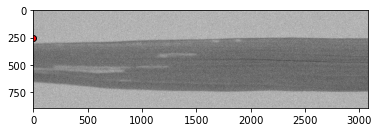

Sigma:300


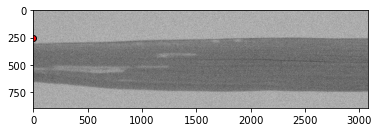

Sigma:350


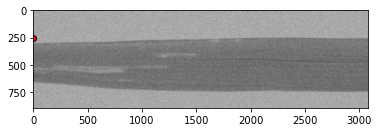

In [28]:
h, w = im_array.shape
print(h, w)
sigma_range = [50, 100, 150, 200, 250, 300, 350]

for sigma in sigma_range:
    print('Sigma:{}'.format(sigma))
    noisy = im_array + ((np.random.random((h, w))*sigma)//1).astype('int')
    plt.scatter(start_point[0], start_point[1], color='r', edgecolor='k')
    plt.imshow(noisy, cmap='gray')
    plt.show()

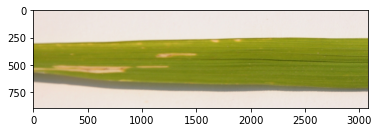

In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

%matplotlib inline 

# Read in the image 
image = cv2.imread('1.jpg') 

# Change color to RGB (from BGR) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(image)


In [31]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB) 
pixel_vals = image.reshape((-1,3)) 

# Convert to float type 
pixel_vals = np.float32(pixel_vals)


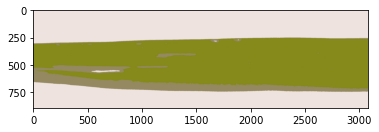

In [32]:
#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85% 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 

# then perform k-means clustering wit h number of clusters defined as 3 
#also random centres are initally chosed for k-means clustering 
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

# convert data into 8-bit values 
centers = np.uint8(centers) 
segmented_data = centers[labels.flatten()] 

# reshape data into the original image dimensions 
segmented_image = segmented_data.reshape((image.shape)) 

plt.imshow(segmented_image)


<Figure size 432x288 with 0 Axes>

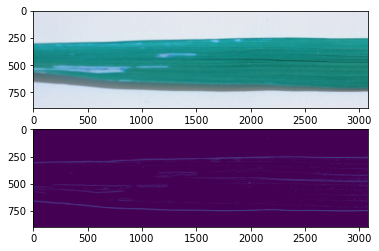

In [33]:
import numpy as np 
import os 
import cv2 
import matplotlib.pyplot as plt 


# defining the canny detector function 

# here weak_th and strong_th are thresholds for 
# double thresholding step 
def Canny_detector(img, weak_th = None, strong_th = None): 
	
	# conversion of image to grayscale 
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
	
	# Noise reduction step 
	img = cv2.GaussianBlur(img, (5, 5), 1.4) 
	
	# Calculating the gradients 
	gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3) 
	gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3) 
	
	# Conversion of Cartesian coordinates to polar 
	mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True) 
	
	# setting the minimum and maximum thresholds 
	# for double thresholding 
	mag_max = np.max(mag) 
	if not weak_th:weak_th = mag_max * 0.1
	if not strong_th:strong_th = mag_max * 0.5
	
	# getting the dimensions of the input image 
	height, width = img.shape 
	
	# Looping through every pixel of the grayscale 
	# image 
	for i_x in range(width): 
		for i_y in range(height): 
			
			grad_ang = ang[i_y, i_x] 
			grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 
			
			# selecting the neighbours of the target pixel 
			# according to the gradient direction 
			# In the x axis direction 
			if grad_ang<= 22.5: 
				neighb_1_x, neighb_1_y = i_x-1, i_y 
				neighb_2_x, neighb_2_y = i_x + 1, i_y 
			
			# top right (diagnol-1) direction 
			elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
				neighb_1_x, neighb_1_y = i_x-1, i_y-1
				neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
			
			# In y-axis direction 
			elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
				neighb_1_x, neighb_1_y = i_x, i_y-1
				neighb_2_x, neighb_2_y = i_x, i_y + 1
			
			# top left (diagnol-2) direction 
			elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
				neighb_1_x, neighb_1_y = i_x-1, i_y + 1
				neighb_2_x, neighb_2_y = i_x + 1, i_y-1
			
			# Now it restarts the cycle 
			elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
				neighb_1_x, neighb_1_y = i_x-1, i_y 
				neighb_2_x, neighb_2_y = i_x + 1, i_y 
			
			# Non-maximum suppression step 
			if width>neighb_1_x>= 0 and height>neighb_1_y>= 0: 
				if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]: 
					mag[i_y, i_x]= 0
					continue

			if width>neighb_2_x>= 0 and height>neighb_2_y>= 0: 
				if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]: 
					mag[i_y, i_x]= 0

	weak_ids = np.zeros_like(img) 
	strong_ids = np.zeros_like(img)			 
	ids = np.zeros_like(img) 
	
	# double thresholding step 
	for i_x in range(width): 
		for i_y in range(height): 
			
			grad_mag = mag[i_y, i_x] 
			
			if grad_mag<weak_th: 
				mag[i_y, i_x]= 0
			elif strong_th>grad_mag>= weak_th: 
				ids[i_y, i_x]= 1
			else: 
				ids[i_y, i_x]= 2
	
	
	# finally returning the magnitude of 
	# gradients of edges 
	return mag 

frame = cv2.imread('1.jpg') 

# calling the designed function for 
# finding edges 
canny_img = Canny_detector(frame) 

# Displaying the input and output image 
plt.figure() 
f, plots = plt.subplots(2, 1) 
plots[0].imshow(frame) 
plots[1].imshow(canny_img) 


In [34]:
# Python programe to illustrate 
# corner detection with 
# Harris Corner Detection Method 

# organizing imports 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
# path to input image specified and 
# image is loaded with imread command 
image = cv2.imread('1.jpg') 

# convert the input image into 
# grayscale color space 
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# modify the data type 
# setting to 32-bit floating point 
operatedImage = np.float32(operatedImage) 

# apply the cv2.cornerHarris method 
# to detect the corners with appropriate 
# values as input parameters 
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 

# Results are marked through the dilated corners 
dest = cv2.dilate(dest, None) 

# Reverting back to the original image, 
# with optimal threshold value 
image[dest > 0.01 * dest.max()]=[0, 0, 255] 

# the window showing output image with corners 
cv2.imshow('Image with Borders', image) 

# De-allocate any associated memory usage 
if cv2.waitKey(0) & 0xff == 27: 
	cv2.destroyAllWindows() 


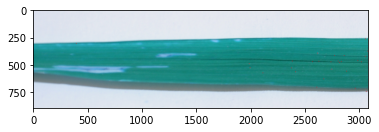

(<matplotlib.image.AxesImage at 0x21658c071f0>, None)

In [35]:
# import the required library 
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 


# read the image 
img = cv2.imread('1.jpg') 

# convert image to gray scale image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# detect corners with the goodFeaturesToTrack function. 
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10) 
corners = np.int0(corners) 

# we iterate through each corner, 
# making a circle at each point that we think is a corner. 
for i in corners: 
	x, y = i.ravel() 
	cv2.circle(img, (x, y), 3, 255, -1) 

plt.imshow(img), plt.show() 


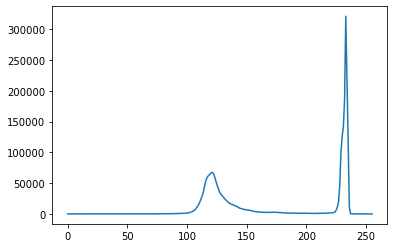

In [36]:
# importing required libraries of opencv 
import cv2 

# importing library for plotting 
from matplotlib import pyplot as plt 

# reads an input image 
img = cv2.imread('1.jpg',0) 

# find frequency of pixels in range 0-255 
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 

# show the plotting graph of an image 
plt.plot(histr) 
plt.show() 


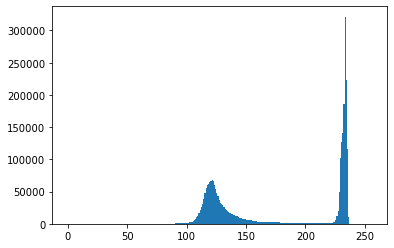

In [37]:
import cv2 
from matplotlib import pyplot as plt 
img = cv2.imread('1.jpg',0) 

# alternative way to find histogram of an image 
plt.hist(img.ravel(),256,[0,256]) 
plt.show() 


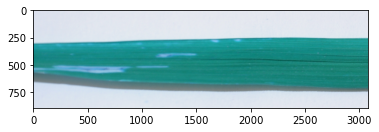

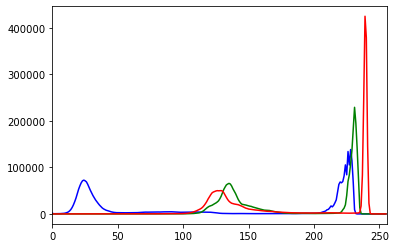

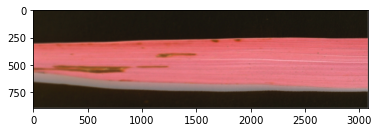

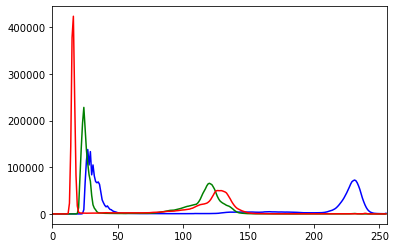

In [38]:
import cv2 
import matplotlib.pyplot as plt 


# Read an image 
img_bgr = cv2.imread('1.jpg', 1) 
plt.imshow(img_bgr) 
plt.show() 

# Histogram plotting of the image 
color = ('b', 'g', 'r') 

for i, col in enumerate(color): 
	
	histr = cv2.calcHist([img_bgr], 
						[i], None, 
						[256], 
						[0, 256]) 
	
	plt.plot(histr, color = col) 
	
	# Limit X - axis to 256 
	plt.xlim([0, 256]) 
	
plt.show() 

# get height and width of the image 
height, width, _ = img_bgr.shape 

for i in range(0, height - 1): 
	for j in range(0, width - 1): 
		
		# Get the pixel value 
		pixel = img_bgr[i, j] 
		
		# Negate each channel by 
		# subtracting it from 255 
		
		# 1st index contains red pixel 
		pixel[0] = 255 - pixel[0] 
		
		# 2nd index contains green pixel 
		pixel[1] = 255 - pixel[1] 
		
		# 3rd index contains blue pixel 
		pixel[2] = 255 - pixel[2] 
		
		# Store new values in the pixel 
		img_bgr[i, j] = pixel 

# Display the negative transformed image 
plt.imshow(img_bgr) 
plt.show() 

# Histogram plotting of the 
# negative transformed image 
color = ('b', 'g', 'r') 

for i, col in enumerate(color): 
	
	histr = cv2.calcHist([img_bgr], 
						[i], None, 
						[256], 
						[0, 256]) 
	
	plt.plot(histr, color = col) 
	plt.xlim([0, 256]) 
	
plt.show() 


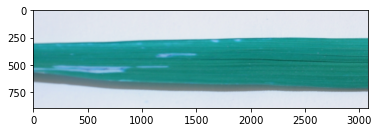

In [39]:
# importing libraries 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
image = cv2.imread('1.jpg') 

plt.imshow( image) 
cv2.waitKey(0) 

# Gaussian Blur 
Gaussian = cv2.GaussianBlur(image, (7, 7), 0) 
plt.imshow( Gaussian) 
cv2.waitKey(0) 

# Median Blur 
median = cv2.medianBlur(image, 5) 
plt.imshow( median) 
cv2.waitKey(0) 


# Bilateral Blur 
bilateral = cv2.bilateralFilter(image, 9, 75, 75) 
plt.imshow( bilateral) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 


In [40]:
import cv2

im = cv2.imread('1.jpg')
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    roi=im[y:y+h,x:x+w]
    cv2.imwrite(str(idx) + '.jpg', roi)
    #cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
cv2.imshow('img',im)
cv2.waitKey(0)  

-1

-1

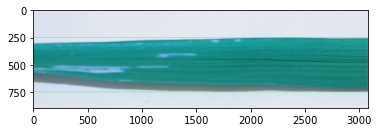

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
# Load image, grayscale, Otsu's threshold 
image = cv2.imread('1.jpg')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1

plt.imshow( image)
cv2.waitKey()

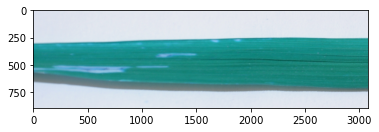

In [42]:
import cv2
import numpy as np

img = cv2.imread("1.jpg")

import matplotlib.pyplot as plt

plt.imshow(img)

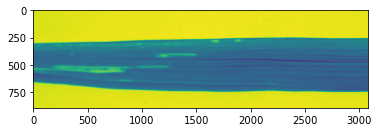

In [44]:
img1 = cv2.imread("1.jpg",0)
plt.imshow(img1)

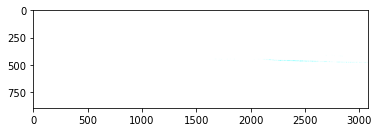

In [45]:
ret,thresh1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap="gray")

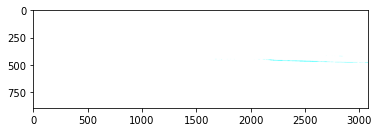

In [46]:
kernel = np.ones((20,20),np.uint8)
opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap="gray")

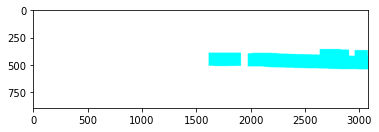

In [47]:
kernel = np.ones((120,120),np.uint8)
erosion = cv2.erode(opening,kernel,iterations = 1)
plt.imshow(erosion, cmap="gray")

In [48]:
merged = cv2.bitwise_and(img1, img , mask=erosion)
plt.imshow(merged, cmap="gray")

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


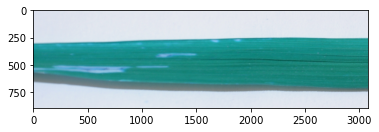

In [49]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("1.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(img)

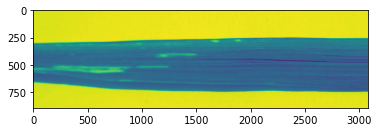

In [50]:
plt.imshow(gray)

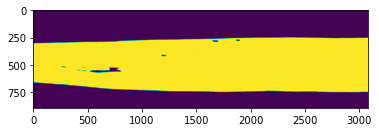

In [51]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(sure_bg)


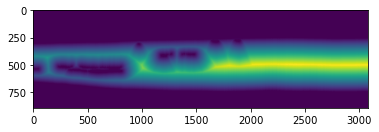

In [52]:
plt.imshow(dist_transform)


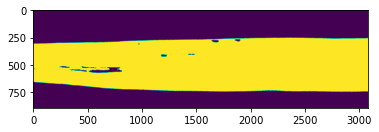

In [53]:
plt.imshow(opening)

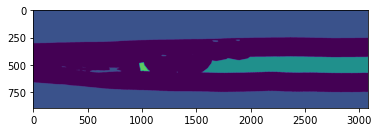

In [54]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)

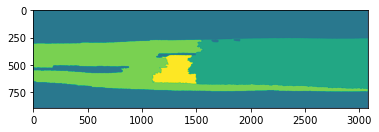

In [55]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(markers)

In [56]:
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(2763657, 3)


In [57]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

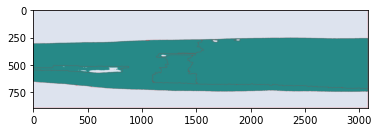

In [58]:
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

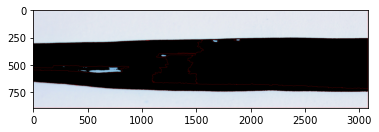

In [59]:
masked_image = np.copy(img)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(img.shape)
# show the image
plt.imshow(masked_image)
plt.show()

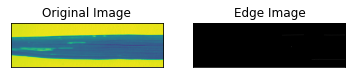

In [61]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread("1.jpg",0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

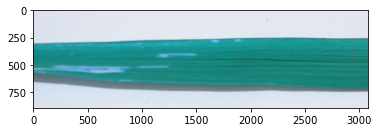

In [63]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
  
# path to input image specified and   
# image is loaded with imread command 
img = cv2.imread("1.jpg") 
  
# convert image to grayscale 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Shi-Tomasi corner detection function 
# We are detecting only 100 best corners here 
# You can change the number to get desired result. 
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10) 
  
# convert corners values to integer 
# So that we will be able to draw circles on them 
corners = np.int0(corners) 
  
# draw red color circles on all corners 
for i in corners: 
    x, y = i.ravel() 
    cv2.circle(img, (x, y), 3, (255, 0, 0), -1) 
  
# resulting image 
plt.imshow(img) 
  
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows() 

In [67]:
from PIL import Image, ImageDraw
from math import sqrt, pi, cos, sin
from canny import canny_edge_detector
from collections import defaultdict

# Load image:
input_image = Image.open("1.jpg")

# Output image:
output_image = Image.new("RGB", input_image.size)
output_image.paste(input_image)
draw_result = ImageDraw.Draw(output_image)

# Find circles
rmin = 18
rmax = 20
steps = 100
threshold = 0.4

points = []
for r in range(rmin, rmax + 1):
    for t in range(steps):
        points.append((r, int(r * cos(2 * pi * t / steps)), int(r * sin(2 * pi * t / steps))))

acc = defaultdict(int)
for x, y in canny_edge_detector(input_image):
    for r, dx, dy in points:
        a = x - dx
        b = y - dy
        acc[(a, b, r)] += 1

circles = []
for k, v in sorted(acc.items(), key=lambda i: -i[1]):
    x, y, r = k
    if v / steps >= threshold and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
        print(v / steps, x, y, r)
        circles.append((x, y, r))

for x, y, r in circles:
    draw_result.ellipse((x-r, y-r, x+r, y+r), outline=(255,0,0,0))

# Save output image
output_image.save("result.png")

ModuleNotFoundError: No module named 'canny'

In [66]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install canny_edge_detector

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement canny_edge_detector (from versions: none)
ERROR: No matching distribution found for canny_edge_detector


In [70]:
import mahotas as mt

In [69]:
pip install mahotas

Note: you may need to restart the kernel to use updated packages.


In [72]:

from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from keras.preprocessing import image
import numpy as np
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,Input
# from keras.layers.advanced_activations import LeakyReLU, ELU
from keras.models import Sequential,Model
from keras import backend as K
from IPython.display import display

In [120]:
#pip install tensorflow

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached tensorboard-2.3.0-py3-none-any.whl (6.8 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached cachetools-4.1.1-py3-none-any.whl (10 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.6-py3-none-any.whl (47 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=934

In [73]:
base_model  = InceptionV3(weights = 'imagenet', include_top=False)
print('loaded model')

87924736/87910968 [==============================] - 8s 0us/step
loaded model


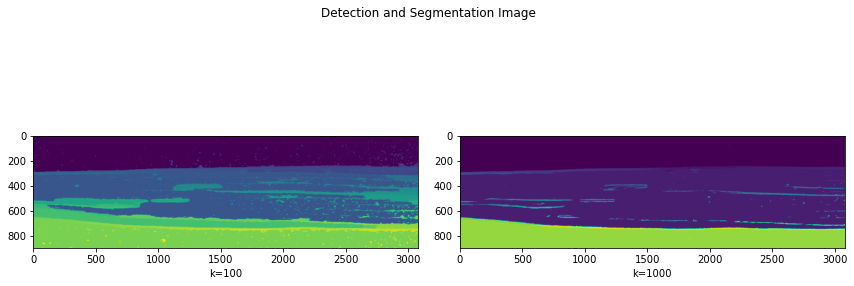

In [74]:
import skimage.segmentation
from matplotlib import pyplot as plt
import scipy.integrate as integrate
import cv2
img2 = cv2.imread("1.jpg")
segment_mask1 = skimage.segmentation.felzenszwalb(img2, scale=100)
segment_mask2 = skimage.segmentation.felzenszwalb(img2, scale=1000)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(segment_mask1); ax1.set_xlabel("k=100")
ax2.imshow(segment_mask2); ax2.set_xlabel("k=1000")
fig.suptitle("Detection and Segmentation Image")
plt.tight_layout()
plt.show()


In [75]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(897, 3081, 3)


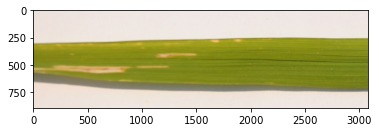

In [76]:
pic = plt.imread('1.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [77]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(2763657, 3)

In [78]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

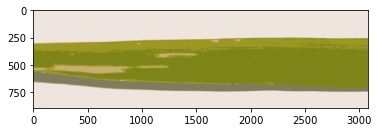

In [79]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

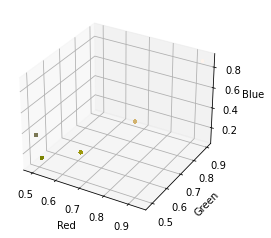

In [80]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
r, g, b = cv2.split(cluster_pic )
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = cluster_pic.reshape((np.shape(cluster_pic)[0]*np.shape(cluster_pic)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [81]:
import cv2
import numpy as np
img=cv2.imread("1.jpg")
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255)) 
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))
HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result=cv2.bitwise_not(global_mask)
cv2.imshow("1_HSV.jpg",HSV_result)
cv2.imshow("2_YCbCr.jpg",YCrCb_result)
cv2.imshow("3_global_result.jpg",global_result)
cv2.imshow("Image.jpg",img)
cv2.imwrite("1_HSV.jpg",HSV_result)
cv2.imwrite("2_YCbCr.jpg",YCrCb_result)
cv2.imwrite("3_global_result.jpg",global_result)
cv2.waitKey(0)
cv2.destroyAllWindows()  

In [82]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


NameError: name 'xrange' is not defined

<Figure size 432x288 with 0 Axes>

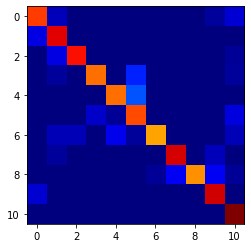

In [86]:
from numpy import *
import matplotlib.pyplot as plt
from pylab import *

conf_arr = [[33,2,0,0,0,0,0,0,0,1,3], [3,31,0,0,0,0,0,0,0,0,0], [0,4,41,0,0,0,0,0,0,0,1], [0,1,0,30,0,6,0,0,0,0,1], [0,0,0,0,38,10,0,0,0,0,0], [0,0,0,3,1,39,0,0,0,0,4], [0,2,2,0,4,1,31,0,0,0,2], [0,1,0,0,0,0,0,36,0,2,0], [0,0,0,0,0,0,1,5,37,5,1], [3,0,0,0,0,0,0,0,0,39,0], [0,0,0,0,0,0,0,0,0,0,38] ]

norm_conf = []
for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i,0)
        for j in i:
                tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111)
res = ax.imshow(array(norm_conf), cmap=cm.jet, interpolation='nearest')


for i,j in ((x,y) for x in xrange(len(conf_arr))
            for y in xrange(len(conf_arr[0]))):
    ax.annotate(str(conf_arr[i][j]),xy=(i,j))

cb = fig.colorbar(res)
savefig("confusion_matrix.png", format="png")

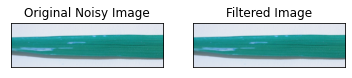

In [85]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
color_image = cv2.imread('1.jpg')
gray_img = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
sliding_window_size_x = 5
sliding_window_size_y = 5
mean_filter_kernel = np.ones((sliding_window_size_x,sliding_window_size_y),np.float32)/(sliding_window_size_x*sliding_window_size_y)
filtered_image = cv2.filter2D(color_image ,-1,mean_filter_kernel)
plt.subplot(121),plt.imshow(color_image ),plt.title('Original Noisy Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtered_image),plt.title('Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()